##  EP20BTECH11015 - Assignment - 2

In [1]:
import numpy as np
from scipy import stats as st
from scipy.optimize import curve_fit
import astropy as ap
import astroML.stats as aml
import pandas as pd
import matplotlib.pyplot as plt

### Q1
In the class, we demonstrated the Central Limit Theorem for a sample drawn from a uniform distribution.

Reproduce a similar plot for a sample drawn the from chi-square distribution with degrees of freedom
equal to 3, for samples drawn once, 5 times, and 10 times.


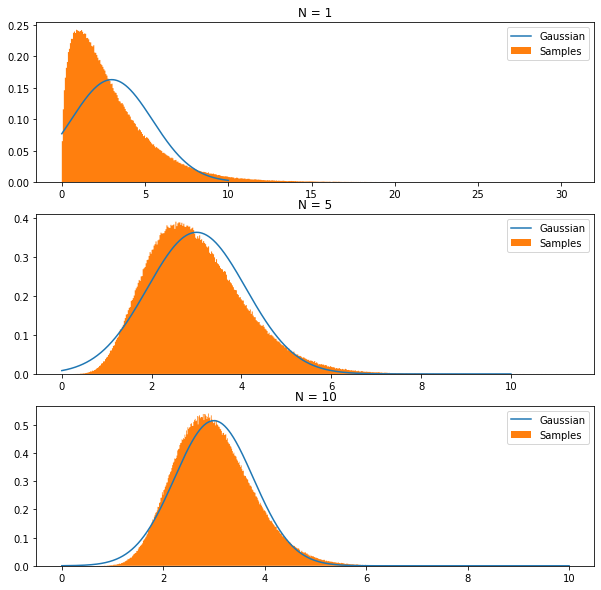

In [2]:
N = [1, 5, 10]

plt.figure(figsize=(10, 10))
for i in range(len(N)):

    # generating random numbers    
    chisample = np.random.chisquare(3, (N[i], 10**6))
    # mean of the samples
    chimean = chisample.mean(axis=0)
    
    plt.subplot(3, 1, i+1)


    #plotting the gaussian
    x = np.linspace(0, 10, 1000)
    gauss = st.norm.pdf(x, chimean.mean(), np.sqrt(chimean.var()))
    plt.plot(x, gauss, label='Gaussian')
    # plotting the histogram
    
    plt.hist(chimean, bins=500, density=True, histtype='stepfilled', label='Samples')
    plt.title('N = {}'.format(N[i]))
    plt.legend()



plt.show()

### Q2

The luminosity and redshift of galaxy clusters from XMM-BCS survey (details available at arXiv:1512.01244)
can be downloaded http://www.iith.ac.in/~shantanud/test.dat. 

Plot the luminosity as a function of redshift on a log-log scale. By eye, do you think the datasets are correlated?

Calculate the Spearman, Pearson and Kendall-tau correlation coefficients and the p-value for the null hypothesis.

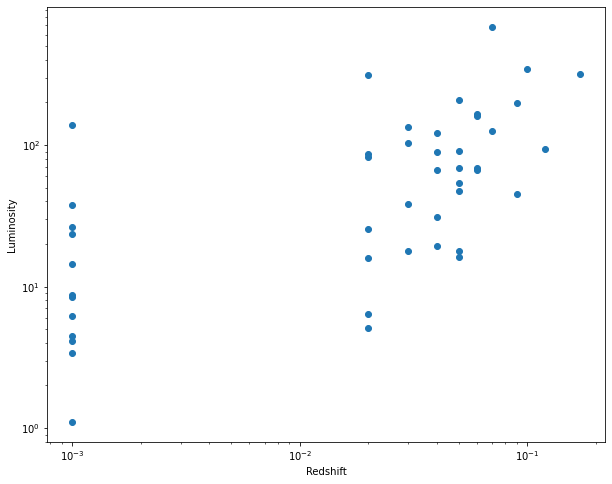

In [3]:
data = np.loadtxt('test.dat')

plt.figure(figsize=(10,8))
plt.scatter(data[:, 1], data[:, 0])
plt.ylabel('Luminosity')
plt.xlabel('Redshift')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### By the eye, the luminosity seems to be somewhat increasing with the redshift. This indicates a moderate positive correlation between them.

In [4]:
spearman = st.spearmanr(data[:, 1], data[:, 0])
print("SPEARMAN_R\n Correlation Coefficient: {}\n p-value: {}\n".format(spearman[0], spearman[1]))

kendall = st.kendalltau(data[:, 1], data[:, 0])
print("KENDALL_TAU\n Correlation Coefficient: {}\n p-value: {}\n".format(kendall[0], kendall[1]))

pearson = st.pearsonr(data[:, 1], data[:, 0])
print("PEARSON_R\n Correlation Coefficient: {}\n p-value: {}\n".format(pearson[0], pearson[1]))



SPEARMAN_R
 Correlation Coefficient: 0.6596325957535454
 p-value: 6.166489759081011e-07

KENDALL_TAU
 Correlation Coefficient: 0.5029584682704178
 p-value: 2.9696862274734036e-06

PEARSON_R
 Correlation Coefficient: 0.5144497852670242
 p-value: 0.0002546471657612425



#### The correlation coeffiecients are around 0.5-0.6, which is a moderate positive correlation. 
#### The p-value is very small, which indicates that the null hypothesis is rejected.

### Q3
Wind speed data from the Swiss Wind Power data website can be found at http://wind-data.ch/tools/weibull.php.

Using the data provided on the website, plot the probability distribution and overlay the
best-fit Weibull distribution (with the parameters shown on the website).

(Hint : A on the website is same as λ, which was used in class to parameterize the Weibull distribution.)

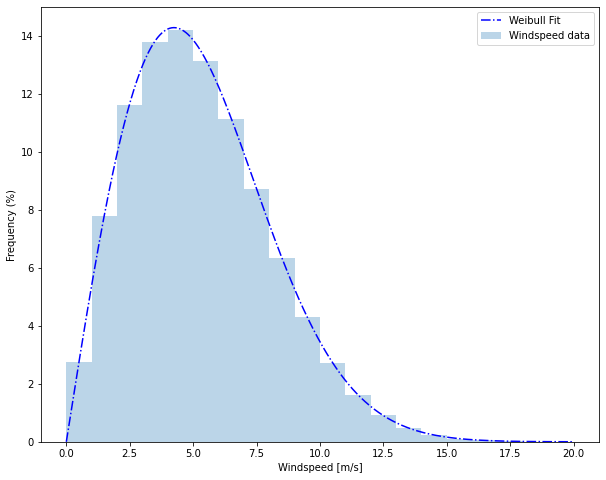

In [5]:
data = pd.read_csv('weibull.dat', sep='\t', header=None)
   
plt.figure(figsize=(10,8))

#Plotting the frequencies
plt.bar(np.linspace(0.5, 20.5, 21)[:-1], data[1],width=1, label='Windspeed data', alpha=0.3)

#Plotting the Weibull Fit
plt.plot(np.linspace(0, 20, 1000), st.dweibull(2, 0, 6).pdf(np.linspace(0, 20, 1000))*200, label='Weibull Fit', c='b', ls = '-.')

plt.xlabel('Windspeed [m/s]')
plt.ylabel('Frequency (%)')
plt.legend()
plt.show()

### Q4
Generate two arrays of size 1000 drawn from a Gaussian distribution of mean of zero and standard
deviation of one.

Calculate Pearson correlation coefficient and its p−value using scipy module. 

Also check if the p− value agrees with that calculated using the Student-t distibution.

In [6]:
#Generating two random normal distributed samples
norm = [st.norm(0, 1).rvs(1000), st.norm(0, 1).rvs(1000)] 

#p-value from pearson_r
pearson = st.pearsonr(*norm)
print("Pearson correlation coefficient r = %.5f\np-value of Pearson = %.5f"%pearson)

#p-value from Student's t.cdf
st_t = pearson.statistic * np.sqrt((1000 - 2) / (1 - pearson.statistic ** 2))

pearson_p_manual = 2*(1 - st.t.cdf(np.abs(st_t), 998))
#Absolute value of t is taken because -ve values of r give p-value > 1

print('p-value from Students t = %.5f\nThe p-values match in both cases' %pearson_p_manual)  


Pearson correlation coefficient r = 0.05686
p-value of Pearson = 0.07231
p-value from Students t = 0.07231
The p-values match in both cases
